In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [3]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from IPython.display import clear_output

In [5]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

# def resize( img, scale_percent= 60, verbose=False):
#   #scale_percent = 60 # percent of original size
#   width = int(img.shape[1] * scale_percent / 100)
#   height = int(img.shape[0] * scale_percent / 100)
#   dim = (width, height)
#   if verbose:
#     print( "scale", scale_percent)
#     print( "dim", dim)
#   # resize image
#   return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [6]:
import time
import shutil

In [7]:
from shutil import copyfile

In [8]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/paired-all/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [9]:
len( files)

3408

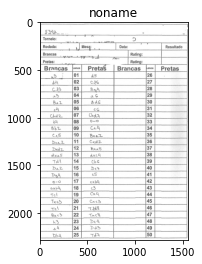

a3 d5 d4 Nf6 Nf3 Bg4 e3 e6 Be2 Bd6 c4 c6 Nbd2 Nbd7 b4 O-O Bb2 Ne4 Ne5 Bxe2 Qxe2 Nxd2 Qxd2 Bxe5 dxe5 dxc4 Rd1 Nb6 Qe2 Qc7 Qg4 c5 O-O cxb4 axb4 c3 Rc1 Na4 Rxc3 Nxc3 Rc1 Rfd8 Bxc3 Rac8 h3 Qc4 e4 Qd3 Qh4 Rd7


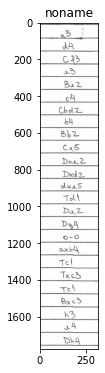

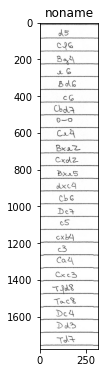

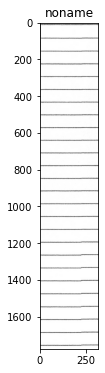

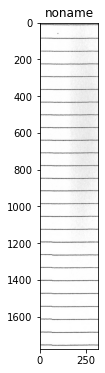

0 71 0 320


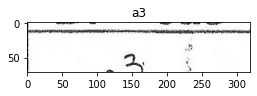

71 71 0 320


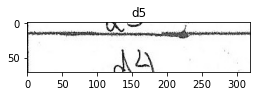

142 71 0 320


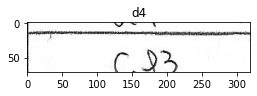

213 71 0 320


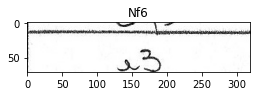

284 71 0 320


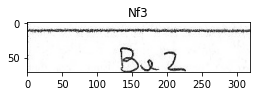

355 71 0 320


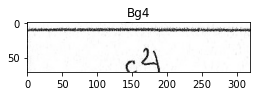

426 71 0 320


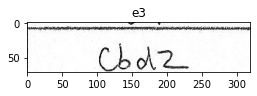

497 71 0 320


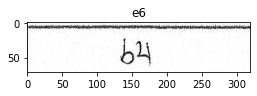

568 71 0 320


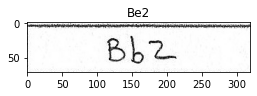

639 71 0 320


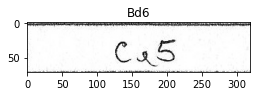

710 71 0 320


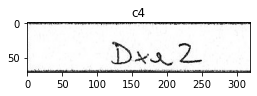

781 71 0 320


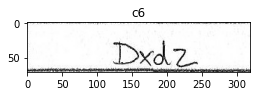

852 71 0 320


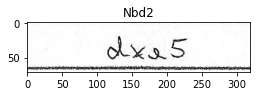

923 71 0 320


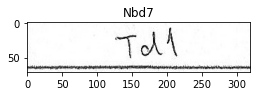

994 71 0 320


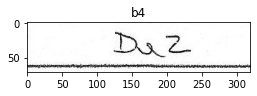

1065 71 0 320


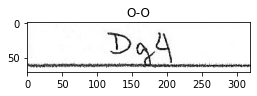

1136 71 0 320


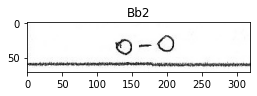

1207 71 0 320


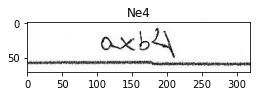

1278 71 0 320


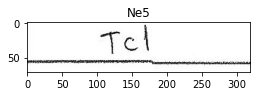

1349 71 0 320


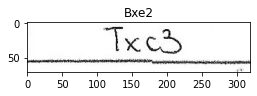

1420 71 0 320


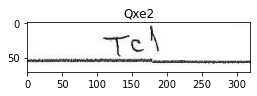

1491 71 0 320


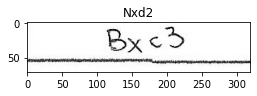

1562 71 0 320


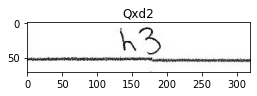

1633 71 0 320


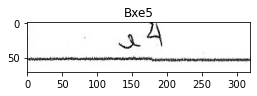

1704 71 0 320


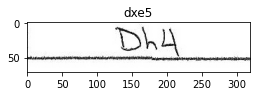

0 71 0 320


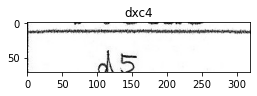

71 71 0 320


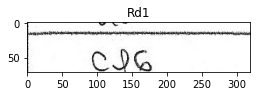

142 71 0 320


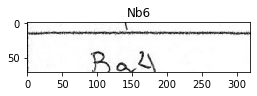

213 71 0 320


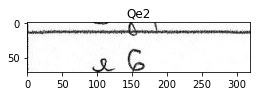

284 71 0 320


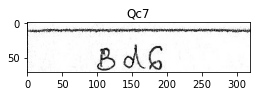

355 71 0 320


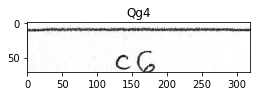

426 71 0 320


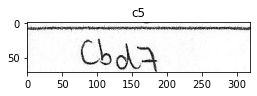

497 71 0 320


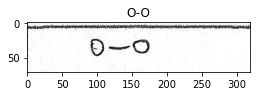

568 71 0 320


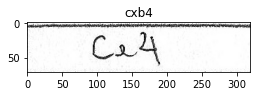

639 71 0 320


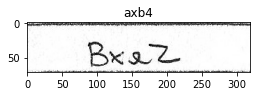

710 71 0 320


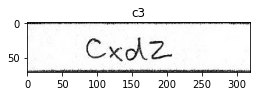

781 71 0 320


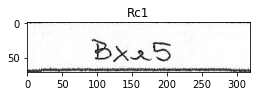

852 71 0 320


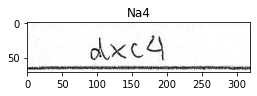

923 71 0 320


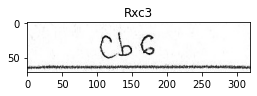

994 71 0 320


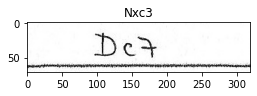

1065 71 0 320


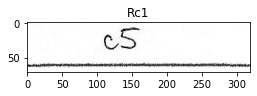

1136 71 0 320


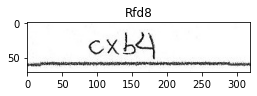

1207 71 0 320


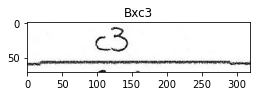

1278 71 0 320


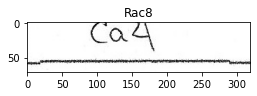

1349 71 0 320


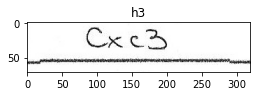

1420 71 0 320


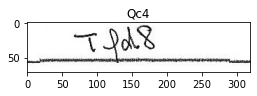

1491 71 0 320


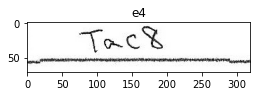

1562 71 0 320


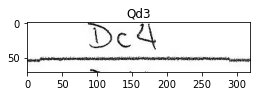

1633 71 0 320


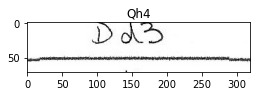

1704 71 0 320


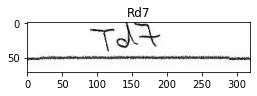

In [10]:
#
# recorta a imagem em partes!!
#
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    print( y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[ int( i/25)]
    h= img.shape[0]/25.0
    ln= i%25
    return crop_only( img, int(h*ln), int(h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 1
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
        show( img)

        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/paired-all/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

        print( labels)

        img1= img[504:,:]
        img2= np.concatenate((
            img1[:, 3:(3+w)],
            img1[:, 435:(435+w)],
            img1[:, 772:(772+w)],
            img1[:, 1200:(1200+w)]
        ), axis= 1)
        showsmall( img1[:, 5:(5+w)])
        showsmall( img1[:, 435:(435+w)])
        showsmall( img1[:, 772:(772+w)])
        showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
        img_3= img1[:, 772:(772+w)]
        img_4= img1[:, 1200:(1200+w)]

        pgn= labels.split()
        col_img= [img_1, img_2, img_3, img_4]
        for i in range( 0, len( pgn)):
            img_cut= get_cut_for( i, col_img)
            showsmall( img_cut, pgn[i])

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_parts( files[0:1])